In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [126]:
# read data
df = pd.read_csv('monthly_data.csv', index_col='date', parse_dates=True)
# drop first row which contain metadata
df.drop(df.index[0], axis=0, inplace=True)
# convert commas to dots
df = df.apply(lambda x: x.str.replace(',','.'))
# convert to numeric and use zeros for NaNs
df = df.fillna(0).astype(float)
df = df.apply(pd.to_numeric)
# show tail
df

,fishoil_price_peru,fish_price_global,rapeseedoil_price_global,fishmeal_price_peru,peanutoil_price_global,soybeanoil_price_global,sunfloweroil_price_global
date,,,,,,,
2022-06-01,0.0,0.0,2000.53,1608.06,2146.19,1751.76,1884.59
2022-05-01,0.0,0.0,2218.45,1634.21,2146.29,1962.88,2079.30
2022-04-01,0.0,0.0,2266.17,1643.39,2145.25,1947.51,2275.76
2022-03-01,0.0,0.0,2162.30,1514.62,2153.15,1956.88,2361.13
2022-02-01,0.0,0.0,1744.20,1445.25,2473.10,1595.74,1499.12
...,...,...,...,...,...,...,...
1985-05-01,315.4,0.0,0.00,0.00,0.00,0.00,0.00
1985-04-01,223.7,0.0,0.00,0.00,0.00,0.00,0.00
1985-03-01,212.9,0.0,0.00,0.00,0.00,0.00,0.00


This code can be used to choose specific rows/columns of the data to get rid of some of the metadata that is used in google sheets and to pick specific features.

In [ ]:
# only use columns (x - y) as data
#df.drop(df.columns[np.r_[x, y:len(df.columns)]], axis=1, inplace=True)

# drop first x rows which contain metadata
#df.drop(df.index[0:x], axis=0, inplace=True)

This code was originally present in this file but I do not know what the intention for it was.

In [127]:
# monthly_df_ip = monthly_df.interpolate(method = 'linear', direction = 'forward')
# monthly_df.dtypes

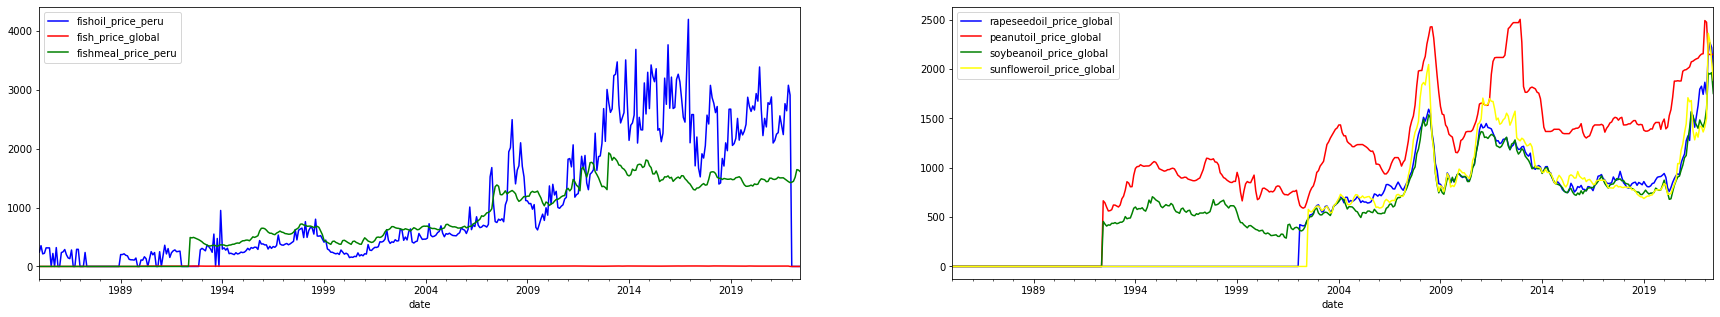

In [128]:
# plot all data
fig, axs = plt.subplots(1,2,figsize=(30, 5))

# only show data in certain interval
date_start = "1980-01-01"
date_end = "2023-01-01"
df_filtered = df[(df.index > date_start) & (df.index < date_end)]

df_filtered.plot(kind='line', y='fishoil_price_peru', color='blue', ax=axs[0])
df_filtered.plot(kind='line', y='fish_price_global', color='red', ax=axs[0])
df_filtered.plot(kind='line', y='fishmeal_price_peru', color='green', ax=axs[0])

df_filtered.plot(kind='line', y='rapeseedoil_price_global', color='blue', ax=axs[1])
df_filtered.plot(kind='line', y='peanutoil_price_global', color='red', ax=axs[1])
df_filtered.plot(kind='line', y='soybeanoil_price_global', color='green', ax=axs[1])
df_filtered.plot(kind='line', y='sunfloweroil_price_global', color='yellow', ax=axs[1])

plt.show()

In [129]:
# transform data to use log ratios
df_processed = df.copy()
# replace all prices by log ratios
for column in df.columns:
    for index in range(0, len(df[column])):
        # first index and indices whith value zero are exceptions
        if ((index < 1) or (df[column][index-1] <= 0) or (df[column][index] <= 0)):
            # set return of zero
            df_processed[column][index] = 0
        else:
            # replace price by return
            df_processed[column][index] = np.log(df[column][index]/df[column][index-1])
print(df_processed.max())
print(df_processed.min())

df_processed.to_csv("../dataframes/monthly_processed.csv")

fishoil_price_peru           1.172202
fish_price_global            0.211208
rapeseedoil_price_global     0.173857
fishmeal_price_peru          0.197009
peanutoil_price_global       0.220339
soybeanoil_price_global      0.242359
sunfloweroil_price_global    0.249037
dtype: float64
fishoil_price_peru          -0.828006
fish_price_global           -0.206227
rapeseedoil_price_global    -0.214876
fishmeal_price_peru         -0.390951
peanutoil_price_global      -0.144880
soybeanoil_price_global     -0.384389
sunfloweroil_price_global   -0.454262
dtype: float64


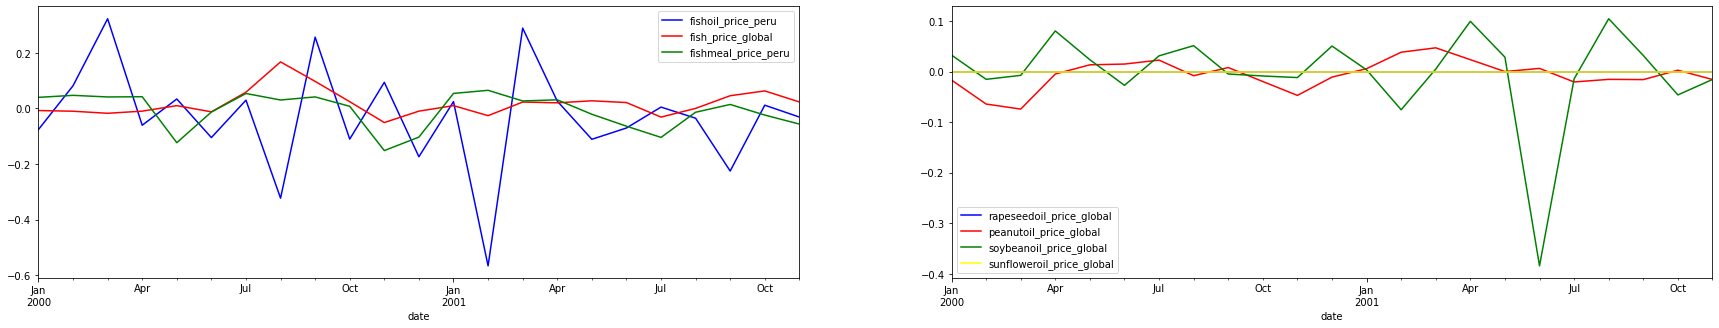

In [130]:
# plot all data
fig, axs = plt.subplots(1, 2, figsize=(30, 5))

# only show data in certain interval
date_start = "1999-12-01"
date_end = "2001-12-01"
df_processed_filtered = df_processed[(df_processed.index > date_start) & (df_processed.index < date_end)]

df_processed_filtered.plot(kind='line', y='fishoil_price_peru', color='blue', ax=axs[0])
df_processed_filtered.plot(kind='line', y='fish_price_global', color='red', ax=axs[0])
df_processed_filtered.plot(kind='line', y='fishmeal_price_peru', color='green', ax=axs[0])

df_processed_filtered.plot(kind='line', y='rapeseedoil_price_global', color='blue', ax=axs[1])
df_processed_filtered.plot(kind='line', y='peanutoil_price_global', color='red', ax=axs[1])
df_processed_filtered.plot(kind='line', y='soybeanoil_price_global', color='green', ax=axs[1])
df_processed_filtered.plot(kind='line', y='sunfloweroil_price_global', color='yellow', ax=axs[1])

plt.show()